 Data Analytics II
  1. Implement logistic regression using Python/R to perform classification on 
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall 
on the given dataset

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
df.shape

(400, 5)

In [11]:
x = df.iloc[:,2:4]  # : means all rows are selected and column from 2 to 3 are selected 
                    #and the last column 4 is neglected unlike loc

In [12]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [13]:
y = df.iloc[:,4]

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

Spliting data into 75% training and 25% testing data

In [15]:
from sklearn.model_selection import train_test_split #for splitting the dataset into train and test

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression #to perform logistic regression
model = LogisticRegression()  #create a variable named model for logistic regression model
model.fit(x_train, y_train)   #fit your model 

LogisticRegression()

In [18]:
model.score(x_test, y_test)

0.63

The score (58%) is not that much impressive, so we will use MinMaxScaler to Scale our original dataset.

In [19]:
from sklearn.preprocessing import MinMaxScaler


In [20]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [21]:
MinMaxScaler()

MinMaxScaler()

In [22]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Modelling - LogisticRegression (Scaled Data)

In [23]:
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [24]:
model.score(x_test_scaled, y_test)

0.87

In [25]:
model.score(x_train_scaled, y_train)

0.8066666666666666

The new accuracy is 87%, which is really impressive.

In [26]:
# This will show how our scaled data looks like

x_train_scaled[0:10]

array([[0.92857143, 0.79259259],
       [0.5       , 0.41481481],
       [0.69047619, 0.07407407],
       [0.14285714, 0.02962963],
       [0.42857143, 0.25925926],
       [0.33333333, 1.        ],
       [0.71428571, 0.1037037 ],
       [0.28571429, 0.68148148],
       [1.        , 0.14074074],
       [0.47619048, 0.34074074]])

# Confusion matrix

This line calls the predict method on a trained machine learning model model, using the testing set features X_test as input. The predict method takes the input features and generates predictions for the corresponding target variable.

In [27]:
y_p = model.predict(x_test_scaled)
y_p

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_p)
print(cm)

[[62  1]
 [12 25]]


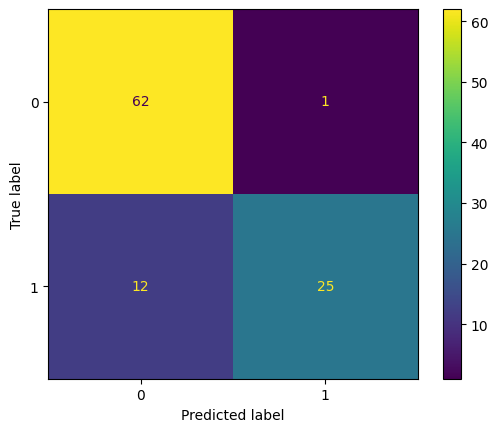

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [42]:
def get_confusion_matrix_values(y_true, y_p):
    cm = confusion_matrix(y_true, y_p)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])
TP, FP, FN, TN = get_confusion_matrix_values(y_test, y_p)
print("TP: ", TP)
print("FP: ", FP)
print("FN: ", FN)
print("TN: ", TN)

TP:  62
FP:  1
FN:  12
TN:  25


# Accuracy 

In [32]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_p)
acc

0.87

# Error rate

In [33]:
# Error rate is given as 1 - Accuracy

err = 1 - acc
err

0.13

# Precision

In [36]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_p)
prec

0.9615384615384616

# Recall

In [37]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_p)
rec

0.6756756756756757